# Sentiment Analysis Neural Network: Domain Adaptation from Snappfood to Digikala

<div style="text-align:justify">Hopefully, the course has been insightful for you till now. This notebook serves as a template for the project which involves training a sentiment analyzer neural network using the comments of a Persian website and fine-tuning it using the comments of another.<br><br>
The first website is Snappfood which is used by the people in Iran to order different kinds of food. The latter is Digikala, an online store for Iranians where people buy many things including smartphones, groceries, cars, and whatever you consider legal. Both websites provide users with ways to express their opinions about the products.<br><br>
A domain shift may be revealed to some degree when switching from Snappfood comments to the ones extracted from Digikala. This will be one of the challenges you will be faced with. So, beware of it!</div>

# P1: Exploring the Datasets 

Both of the datasets are added to the notebook. In this part, we want to explore their contents. 

Load both of the datasets 

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
import csv

with open('/kaggle/input/snappfood-persian-sentiment-analysis/Snappfood - Sentiment Analysis.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    count = 0
    for row in reader:
        count += 1
        if count == 501:
            print(row)
    print(count)

['\tطعم ساندویچ فیله مرغ کبابی با ساندویچی قبلا از شعبه\u200cی بلوار قیطریه گرفته بودم خیلی فرق داشت', 'خیلی از طعمش راضی نبودم. سالاد سزار هم به نسبت سایر رستوران\u200cها کوچک بود.\tSAD\t1']
70003


In [3]:
df_snappfood = pd.read_csv('/kaggle/input/snappfood-persian-sentiment-analysis/Snappfood - Sentiment Analysis.csv', delimiter='\t')

df_digikala = pd.read_csv('/kaggle/input/digikala-comments-persian-sentiment-analysis/data.csv')

In [4]:
df_snappfood.head()

,Unnamed: 0,comment,label,label_id
0,NaN,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1.0
1,NaN,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0.0
2,NaN,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1.0
3,NaN,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0.0
4,NaN,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0.0


In [5]:
df_digikala.head()

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1


Count the number of comments each dataset contains 

In [6]:
print('Number of comments taht SnappFood database contains: ', len(df_snappfood))
print('Number of comments that DigiKala database contains: ', len(df_digikala))

Number of comments taht SnappFood database contains:  70000
Number of comments that DigiKala database contains:  3261


Represent the distribution of comments in the Snappfood dataset in terms of being negative or positive

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


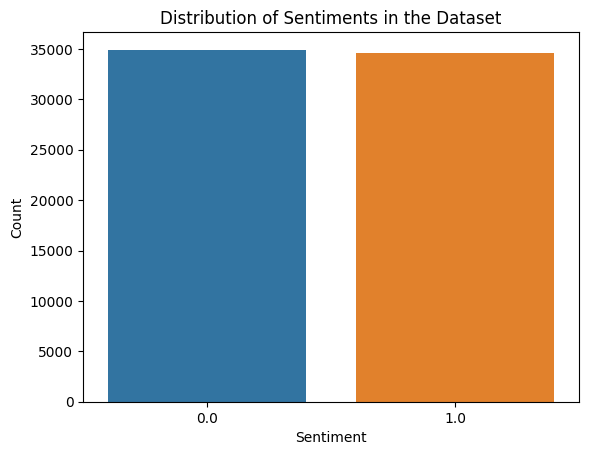

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#df_snappfood['label'] = df_snappfood['label'].replace({'SAD': 1, 'HAAPY': -1})

sns.countplot(x='label_id', data=df_snappfood)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in the Dataset')

plt.show()


Plot the logarithm of the frequency of words as a function of the logarithm of their rank to demonstrate the Zipf's law. <br>

In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


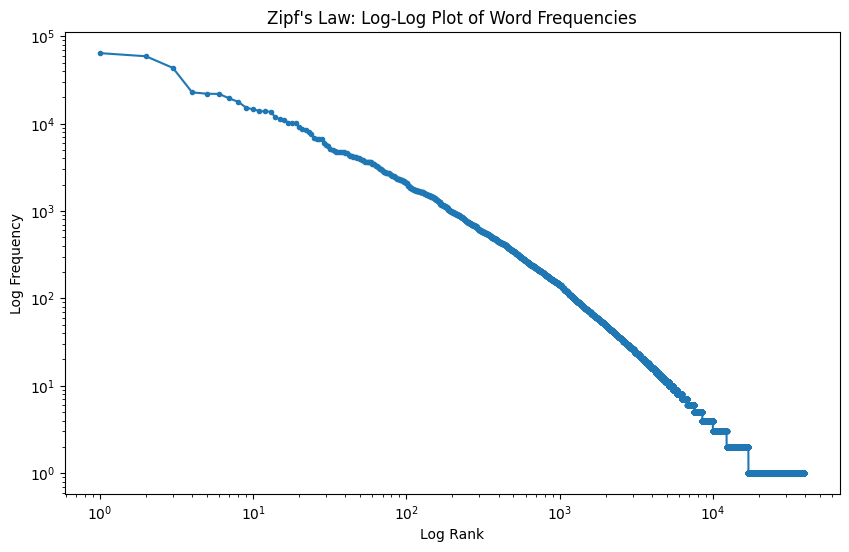

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter


comments = df_snappfood['comment'].astype(str).apply(word_tokenize)

all_words = [word for sublist in comments for word in sublist]

word_freq = Counter(all_words)

sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

ranks = np.arange(1, len(sorted_words) + 1)
frequencies = [word[1] for word in sorted_words]

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.')
plt.title("Zipf's Law: Log-Log Plot of Word Frequencies")
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.show()

Add a new column to the Digikala dataset indicating whether the comment was positive, negative, or neutral. This will be needed later for classification. <br>
Note: This can be done in many ways. You should the appropriate method. 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

df_snappfood.fillna({'label': 'SAD'}, inplace=True)
df_snappfood.fillna({'label_id': 0}, inplace=True)

# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(df_snappfood['comment'])
y_train = df_snappfood['label']

# Step 2: Train a Sentiment Analysis Model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 3: Predict Sentiments for df_digikala
X_test = vectorizer.transform(df_digikala['Text'])
df_digikala['predicted_label'] = model.predict(X_test)

df_digikala.loc[(df_digikala['Suggestion'].between(2,3)) & (df_digikala['Score'].between(70, 90)), 'predicted_label2'] = 'NEUTRAL'

In [12]:
pd.set_option('display.max_colwidth', None)
df_digikala.head(20)

,Text,Score,Suggestion,predicted_label,predicted_label2
0,این اولین تجربه من برای خرید ایفون هست امروز ب دستم رسیده به اسم طلایی هست ولی دراصل رزگلده خیلی هم خوش رنگ هست,100,1,SAD,NaN
1,خرید این محصول رو توصیه میکنم,84,1,SAD,NaN
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ندیدم,60,1,SAD,NaN
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیفیت ساخت سرعت اجرا کیفیت صدا و تصویر از نظر حافظه هم فقط 5 گیگ در دسترس شما قرار میگیره,96,1,HAPPY,NaN
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند این رو بدونند که صفحه با گوریلا گلس 5 محافظت میشه و با خدمات ویژه سامسونگ اگر تحت هر شرایط صفحه گوشی دچار ایراد بشه با 200 هزار تومان صفحه رو براتون تعویض میکنند و از لحاظ امکانات هم گوشی عالیه و من از خرید خودم راضیم,92,1,HAPPY,NaN
5,من پکیج کاملش روخریدم ازهرنظرعالیه هیچ نقدوایرادی بهش وارد نیست فقط یه گوشی لوکسه باید خیلی مواظب ضربه خوردن وشکستنش باشین,60,1,SAD,NaN
6,اول از همه خوشحالم که بالاخره نسخه های 128 گیگابایتی برای فروش قرار گرفت چون همیشه من با حافظه گوشی های اندرویدی مشکل داشتم گوشی قبلی من s7 بود و بعد از 2 سال استفاده که بسیار هم راضی بودم به دلیل تغییرات مثبتی که در گوشی های سامسونگ ایجاد شد تصمیم گرفتم گوشی رو عوض کنم این گوشی واقعا زیباست و طراحی منحصر به فردی داره زمانی که گوشی رو در دست میگیرید بسیار خودش دست هست و حس خیلی خوبی داره تنها دلیلی که نسخه پلاس رو انتخاب نکردم بزرگی بیش از حد و وزن گوشی بود ولی این نسخه از نظر اندازه فوق العادست کیفیت و بلندی صدای اسپیکر ها عالی هست زمانی که با گوشی قبلی خودم تست کردم واقعا تفاوت زیادی حس میشد همچنین با گوشی HTC U11 هم مقایسه کردم و باز هم بلندی صدای اس 9 بیشتر بود اما از نظر کیفیت شاید کمی u11 بهتر بود نگرانی من جای سنسور اثر انگشت بود چون با اس8 که کار کرده بودم اصلا جای مناسبی نداشت ولی این مشکل با تغییر جای سنسور بنظرم کاملا حل شده و سرعت سنسور هم عالی هست و با وجود Intelligent scan که ترکیب سنسور عنبیه و تشخیص چهره هست خیلی نیازی به اثر انگشت احساس نمیشه چون حتی توی تاریکی مطلق هم به سرعت گوشی از این طریق باز میشه اما یک ایراد امنیتی که دیدم این بود که اگر چشمای من بسته باشه باز هم با روش intelligent scan گوشی سریعا باز میشه ولی توی آیفون X ظاهرا با چشمان بسته گوشی باز نمیشه و این از نظر امنیت خیلی بهتره دوربین سلفی خیلی بهتر از گوشی قبلی من هست ولی تفاوت زیادی توی دوربین اصلی با گوشی قبلی خودم ندیدم درکل دوربین اصلی کیفیت خوبی داره و به نسبت نسل های قبل توی زوم آخر نویز کمتری دیده میشه یکی از قابلیت هایی که روی دوربین اس 9 پلاس وجود داره به دلیل دو دوربین بودن گوشی میتونه عکس های بوکه بگیره ولی این گوشی هم چنین قابلیتی داره به اسم selective focus که اگر جسم در فاصله نیم متری باشه دقیقا همون افکت بوکه رو میتونه اعمال کنه و از نظر عملکرد هم خوب بود و در نهایت کیفیت صفحه هم که فوق العادست و بنظرم بهترین هست و چند مورد هم از نقاط ضعف بگم باتری باتری متاسفانه زیاد رضایت بخش نیست و بنظرم به زور میتونه گوشی رو از صبح ساعت 7 8 تا 12 شب برسونه البته استفاده من زیاد هست و همیشه اینترنت هم روشن هست مخصوصا 4G ولی باز انتظار بیشتری میرفت که ظاهرا نسخه پلاس توی این مورد بهتره مورد بعد AR ایموجی هست که واقعا از نظر عملکرد ضعیف هست و کلا فقط یکبار تستش کردم و کلا ناامید شدم و دوستان هم تست کردن و اصلا نتیجه جالبی نداشت و همرو تقریبا یکسان نشون میده نمیدونم چرا سامسونگ این همه روی قابلیت AR ایموجی تبلیغ کرد وقتی به بلوغ نرسیده و ای کاش مثل نسخه پلاس 6 گیگابایت رم داشت و نمیدونم چرا سامسونگ خواست مثل اپل بین نسخه معمولی و پلاس فرق بزاره همش تقصیر اپل هست اینارو باب میکنه D چون تقریبا 14 15 تا اپ که باز باشه دیگه قبلی هارو میبنده و شروع به ریلود کردن برنامه ها میکنه اگر بازی سنگین اجرا بشه که وضعیت بدتر میشه و با 5 6 تا اپ باز به مشکل بر میخوره و همرو موقع اجرای دوباره ریلود میکنه در نهایت از خریدم راضی هستم ولی اگر رم 6 گیگابایتی و دوربین دوم نسخه پلاس رو داشت واقعا عالی میشد چون اصلا نمیتونستم با نسخه پلاس از نظر اندازه کنار بیام و اگر روی قابلیت AR ایموجی بیشتر کار بشه و مثل آیفون X دوربین اسکن سه بعدی اضافه بشه قطعا قابلیت جالبی میشه,96,1,SAD,NaN
7,من دو ماهه خریدم واقعا راضیم دوربینشم عالیه بهترین گوشی در رنج قیمت خودشه,100,1,HAPPY,NaN
8,بنظر من گوشی خوب و مقرون به صرفه ای بود توی این دوسالی که داشتمش همه جور استفاده ای ازش کردم از بازی های نسبتا سنگین دیتا دار تا استفاده های معمولی صفحه نم

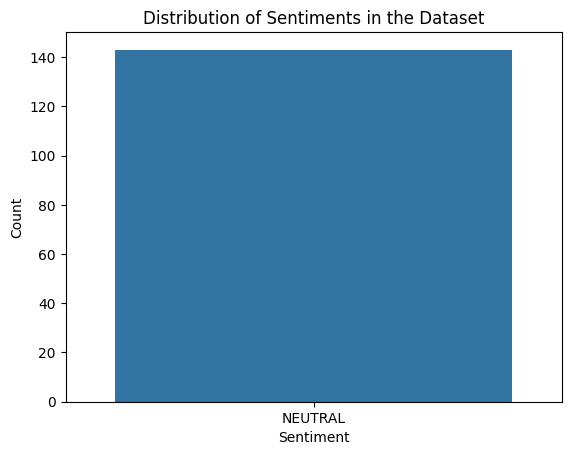

In [13]:
sns.countplot(x='predicted_label2', data=df_digikala)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in the Dataset')

plt.show()

Split each dataset into training, testing, and validation sets.

In [14]:
from sklearn.model_selection import train_test_split

X_snappfood = df_snappfood['comment']
y_snappfood = df_snappfood['label_id']

X_train_snappfood, X_test_snappfood, y_train_snappfood, y_test_snappfood = train_test_split(X_snappfood, y_snappfood, test_size=0.4, random_state=42)
X_validation_snappfood, X_test_snappfood, y_validation_snappfood, y_test_snappfood = train_test_split(X_test_snappfood, y_test_snappfood, train_size=0.5, random_state=42)

df_digikala['predicted_label'] = df_digikala['predicted_label'].replace({'SAD': 0, 'HAPPY': 1})

X_digikala = df_digikala['Text']
y_digikala = df_digikala['predicted_label']

X_train_digikala, X_test_digikala, y_train_digikala, y_test_digikala = train_test_split(X_digikala, y_digikala, test_size=0.4, random_state=42)
X_validation_digikala, X_test_digikala, y_validation_digikala, y_test_digikala = train_test_split(X_test_digikala, y_test_digikala, train_size=0.5, random_state=42)



# P2: Preprocessing and Feature Extraction

The goal of this part is to make the Snappfood dataset ready for the neural network to be trained with.<br>
Note: You can use many libraries including `NLTK`, `Spacy`, `Hazm`, `Parsivar`, `Stanza` etc.

Remove the unnecessary characters of the dataset. <br>


In [15]:
pip install parsivar

  Obtaining dependency information for parsivar from https://files.pythonhosted.org/packages/7c/9a/24b99d69ea31ed02974576d7d09d4f305ae574c52145b1ad998fd4a58285/parsivar-0.2.3.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 48.6 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [16]:
from parsivar import Normalizer, Tokenizer
import re

def preprocess_text(text):
    # Clean the text
    cleaned_text = re.sub(r'[^آابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهی]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    # Normalize the text
    normalizer = Normalizer()
    normalized_text = normalizer.normalize(cleaned_text)

    # Tokenize the normalized text
    tokenizer = Tokenizer()
    tokens = tokenizer.tokenize_words(normalized_text)

    # Join the tokens to get the preprocessed text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


Normalize the dataset. <br>
Note: Check the result. For instance, if you do this correctly, you'll have a dataset containing just 1 type of space. 

In [17]:
X_train_snappfood = X_train_snappfood.apply(preprocess_text)
X_test_snappfood = X_test_snappfood.apply(preprocess_text)
X_validation_snappfood = X_validation_snappfood.apply(preprocess_text)

X_train_digikala = X_train_digikala.apply(preprocess_text)
X_test_digikala = X_test_digikala.apply(preprocess_text)
X_validation_digikala = X_validation_digikala.apply(preprocess_text)

If you want to include other preprocessing steps, put all of your code here.

In [18]:
X_train_snappfood.head()

11609            من این سفارش را فقط به خاطر نوار بهداشتی بالدار نازک پنبه‌ریز ثبت کرده‌بودم باقی اقلام را زیاد نیاز نداشتم اینکه ندارند به جاش هر چی دلشون می‌خواد می‌فرستند بعد میگویند این همونه بسیار ناراحت‌کننده است
4660                                                                                                                                                            شیر موز پسته فاقد شیر‌بود بستنی پسته‌بود کیفیت بستنی پایین
49596                                                                                                                                                                                         در حد انتظار نبود راضی نبودم
35299                                                                                                                                                                                                    خیلی خیلی شور بود
648      نکته مثبت این رستوران تحویل به موقع‌بود و نکته منفی بی‌کیفیت ترین پیتزایی که تا حالا امتحان کرده‌بودم و واقعا قابل 

In [19]:
X_train_digikala.head()

489                                                                                                                                                                                                                                                                                                                                                                          سلام من حدودا دو هفته است که این لپ تاپ رو از دیجی کالا خریدم چیزخوبیه فقط تنهامشکلی که داره اینه که بعدازیه مدت کوتاهی صدای خرخری آزارم میده صدای کمیه ولی احساس میکنم ازناحیه هارد دیسکش باشه مشکل دیگه‌ای نداره فقط این صدای خرخر ش بد جوری روی اعصابم راه میره
1446                                                                                                                                                                                                                                                                                                                                                                                    

Extract features from the Snappfood dataset
<br> Note: You should use both of the following methods, and compare the results at the end.
- Method 1 (Classic): Use `CountVectorizer` or `TF-IDF`.
- Method 2 (Modern): Use `Word2Vec`, `FastText`, `GloVe`, `Doc2Vec` or train your own `Embedding` Layer. 

If you choose to train your own `Embedding`s, you'll just need to specify an ID for each word remaining in your dataset. 

In [20]:
# Classic Method

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 100)
X_train_snappfood_tfidf = tfidf.fit_transform(X_train_snappfood).toarray()
X_test_snappfood_tfidf = tfidf.transform(X_test_snappfood).toarray()
X_validation_snappfood_tfidf = tfidf.transform(X_validation_snappfood).toarray()

print(X_train_snappfood_tfidf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.25603735 0.         ... 0.         0.         0.        ]]


In [21]:
pip install hazm

  Obtaining dependency information for hazm from https://files.pythonhosted.org/packages/91/8c/cc3d01c27681eb8223781ea162a23f9926647ce864eb601a19aee4bce0af/hazm-0.10.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 31.3 MB/s eta 0:00:00
  Obtaining dependency information for python-crfsuite<0.10.0,>=0.9.9 from https://files.pythonhosted.org/packages/38/1d/c475ba7d11e9735f00eb08e2f5315aa2e21c24cc85a0474c3fd425edef58/python_crfsuite-0.9.10-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
# Modern Method

from gensim.models import Word2Vec
from hazm import word_tokenize, stopwords_list

w2v = Word2Vec([text.split() for text in X_train_snappfood], window=5, min_count=5, workers=4)

def vectorize(text):
    words = [w2v.wv[word] for word in text.split() if word in w2v.wv]
    if not words:
        return np.zeros(100)
    words = np.array(words)
    return words.mean(axis=0)

X_train_snappfood_w2v = np.array([vectorize(text) for text in X_train_snappfood])
X_test_snappfood_w2v = np.array([vectorize(text) for text in X_test_snappfood])
X_validation_snappfood_w2v = np.array([vectorize(text) for text in X_validation_snappfood])

print(X_train_snappfood_w2v)

[[-0.21090384  0.30498585  0.37912652 ... -0.06344489  0.13625598
  -0.10260044]
 [ 0.30279016  0.17887713 -0.10902634 ... -0.17615774 -0.27984071
  -0.27433211]
 [-0.1052021  -0.10989889 -0.24469358 ... -0.03812666  0.37265682
   0.45862797]
 ...
 [ 0.04777654  0.0728919  -0.16149303 ... -0.10977128 -0.00340929
   0.29338348]
 [-0.00794604  0.02289598  0.27850804 ... -0.02562418 -0.03417836
   0.09051222]
 [ 0.07912802 -0.29697379  0.45334455 ... -0.010837    0.09893942
   0.0521022 ]]


In [23]:
# Modern Method

#from gensim.models import Word2Vec
#from hazm import word_tokenize, stopwords_list


#stop_words = set(stopwords_list())
#X_train_snappfood['tokenized_comment'] = X_train_snappfood['comment'].apply(lambda x: [word for word in word_tokenize(x) if word.isalpha() and word not in stop_words])
#X_test_snappfood['tokenized_comment'] = X_test_snappfood['comment'].apply(lambda x: [word for word in word_tokenize(x) if word.isalpha() and word not in stop_words])
#X_validation_snappfood['tokenized_comment'] = X_validation_snappfood['comment'].apply(lambda x: [word for word in word_tokenize(x) if word.isalpha() and word not in stop_words])

#model = Word2Vec(sentences=df_snappfood['tokenized_comment'], vector_size=500, window=5, min_count=1, workers=4)

#def get_sentence_vector(sentence, model):
#    vector = [model.wv[word] for word in sentence if word in model.wv]
#    return sum(vector) / len(vector) if vector else None

#X_train_snappfood['word2vec_feature'] = X_train_snappfood['tokenized_comment'].apply(lambda x: get_sentence_vector(x, model))
#X_test_snappfood['word2vec_feature'] = X_test_snappfood['tokenized_comment'].apply(lambda x: get_sentence_vector(x, model))
#X_validation_snappfood['word2vec_feature'] = X_validation_snappfood['tokenized_comment'].apply(lambda x: get_sentence_vector(x, model))

#X_train_snappfood.head()

# P3: Training and Initial Evaluation 

Define an architecture for your neural network.

In [24]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(input_shape, 1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
    model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model


In [25]:
w2v_vector_size = w2v.vector_size
tfidf_vector_size = np.shape(tfidf.get_feature_names_out())[0]

model_w2v = create_model(w2v_vector_size)

model_tf = create_model(tfidf_vector_size)

Train the network on the Snappfood dataset, while monitoring its performance on the validation set. 

In [26]:
history = model_w2v.fit(X_train_snappfood_w2v, y_train_snappfood, epochs=20, batch_size=256,validation_data=(X_validation_snappfood_w2v, y_validation_snappfood),callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/20
165/165 [==============================] - 57s 300ms/step - loss: 0.5679 - acc: 0.6835 - val_loss: 0.4468 - val_acc: 0.8011
Epoch 2/20
165/165 [==============================] - 48s 292ms/step - loss: 0.4568 - acc: 0.7903 - val_loss: 0.4293 - val_acc: 0.8128
Epoch 3/20
165/165 [==============================] - 48s 293ms/step - loss: 0.4430 - acc: 0.7974 - val_loss: 0.4157 - val_acc: 0.8154
Epoch 4/20
165/165 [==============================] - 48s 291ms/step - loss: 0.4312 - acc: 0.8039 - val_loss: 0.4056 - val_acc: 0.8219
Epoch 5/20
165/165 [==============================] - 48s 294ms/step - loss: 0.4259 - acc: 0.8074 - val_loss: 0.4006 - val_acc: 0.8226
Epoch 6/20
165/165 [==============================] - 48s 289ms/step - loss: 0.4168 - acc: 0.8133 - val_loss: 0.3972 - val_acc: 0.8261
Epoch 7/20
165/165 [==============================] - 48s 293ms/step - loss: 0.4127 - acc: 0.8147 - val_loss: 0.4011 - val_acc: 0.8264
Epoch 8/20
165/165 [==============================] - 4

In [27]:
history = model_tf.fit(X_train_snappfood_tfidf, y_train_snappfood, epochs=20, batch_size=256,validation_data=(X_validation_snappfood_tfidf, y_validation_snappfood),callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/20
165/165 [==============================] - 57s 300ms/step - loss: 0.6641 - acc: 0.5978 - val_loss: 0.6605 - val_acc: 0.6078
Epoch 2/20
165/165 [==============================] - 49s 297ms/step - loss: 0.6279 - acc: 0.6517 - val_loss: 0.6157 - val_acc: 0.6610
Epoch 3/20
165/165 [==============================] - 58s 351ms/step - loss: 0.6182 - acc: 0.6626 - val_loss: 0.6100 - val_acc: 0.6719
Epoch 4/20
165/165 [==============================] - 49s 298ms/step - loss: 0.6078 - acc: 0.6718 - val_loss: 0.5982 - val_acc: 0.6786
Epoch 5/20
165/165 [==============================] - 49s 299ms/step - loss: 0.5885 - acc: 0.6883 - val_loss: 0.5641 - val_acc: 0.7074
Epoch 6/20
165/165 [==============================] - 51s 309ms/step - loss: 0.5675 - acc: 0.7049 - val_loss: 0.5568 - val_acc: 0.7116
Epoch 7/20
165/165 [==============================] - 53s 319ms/step - loss: 0.5511 - acc: 0.7175 - val_loss: 0.5384 - val_acc: 0.7257
Epoch 8/20
165/165 [==============================] - 5

Evaluate the performance of your network on the Snappfood testing set. 

In [28]:
from sklearn.metrics import accuracy_score, f1_score

pred_w2v = np.round(model_w2v.predict(X_test_snappfood_w2v))
pred_tfidf = np.round(model_tf.predict(X_test_snappfood_tfidf))

print("f1score for w2v: ",f1_score(y_test_snappfood, pred_w2v))
print("accuracy for w2v: ",accuracy_score(y_test_snappfood, pred_w2v))

print("f1score for tfidf: ",f1_score(y_test_snappfood, pred_tfidf))
print("accuracy for tfidf: ",accuracy_score(y_test_snappfood, pred_tfidf))

438/438 [==============================] - 7s 15ms/step
f1score for w2v:  0.835626858446857
accuracy for w2v:  0.8302142857142857
f1score for tfidf:  0.7927228947896462
accuracy for tfidf:  0.7786428571428572


Save the weights of the neural network and its architecture seperately in the notebook's output folder (`/kaggle/working/`).

In [29]:
import tensorflow as tf

with open('/kaggle/working/w2v.json', 'w') as json_file:
    json_file.write(model_w2v.to_json())

model_w2v.save_weights('/kaggle/working/w2v_weights.h5')



with open('/kaggle/working/tfidf.json', 'w') as json_file:
    json_file.write(model_tf.to_json())

model_tf.save_weights('/kaggle/working/tfidf_weights.h5')

# P4: Fine-tuning and Evaluation 

In this part, we will fine-tune the previously trained network on the comments extracted from Digikala.

Load the neural network along with its weights

In [30]:
from tensorflow.keras.models import model_from_json


with open('/kaggle/working/w2v.json', 'r') as json_file:
    model_w2v_json = json_file.read()
    
model_w2v = model_from_json(model_w2v_json)

model_w2v.load_weights('/kaggle/working/w2v_weights.h5')



with open('/kaggle/working/tfidf.json', 'r') as json_file:
    model_tfidf_json = json_file.read()
    
model_tfidf = model_from_json(model_tfidf_json)

model_tfidf.load_weights('/kaggle/working/tfidf_weights.h5')

Change the architecture of the network (the last layer) to make it appropriate for classifying the sentiment of a comment in one of the previously mentioned three classes: positive, negative, or neutral.

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

model_w2v.layers.pop()

sentiment = Dense(1, activation='softmax')(model_w2v.layers[-1].output)
model_w2v = Model(inputs=model_w2v.input, outputs=sentiment)
model_w2v.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_tfidf.layers.pop()

sentiment = Dense(1, activation='softmax')(model_tfidf.layers[-1].output)
model_tfidf = Model(inputs=model_tfidf.input, outputs=sentiment)
model_tfidf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Extract features from the Digikala dataset.<br>
Note: Pay attention to the fact that your features are the same as the ones you extracted from the Snappfood dataset. You just need to use the same method for the new dataset. For instance, if you consider the `CountVectorizer` as your feature extractor, the set of the words for which you'll count the frequency will not change! 

In [32]:
X_train_digikala_w2v = np.array([vectorize(text) for text in X_train_digikala])
X_test_digikala_w2v = np.array([vectorize(text) for text in X_test_digikala])
X_validation_digikala_w2v = np.array([vectorize(text) for text in X_validation_digikala])

X_train_digikala_tfidf = tfidf.transform(X_train_digikala).toarray()
X_test_digikala_tfidf = tfidf.transform(X_test_digikala).toarray()
X_validation_digikala_tfidf = tfidf.transform(X_validation_digikala).toarray()

Fine-tune the network on the training set associated with the Digikala dataset, while monitoring its performance on the corresponding validation set.<br>
Note: The process of fine-tuning should follow one of these methods:
- Method 1: Fix the weights for all layers expect the last one.
- Method 2: Use a really small learning rate for all layers except the last one.



In [33]:
X_train_digikala_w2v = X_train_digikala_w2v.astype('float32')
y_train_digikala = y_train_digikala.astype('float32')
X_validation_digikala_w2v = X_validation_digikala_w2v.astype('float32')
y_validation_digikala = y_validation_digikala.astype('float32')

In [34]:
x = len(model_w2v.layers)
for layer in model_w2v.layers[:x]:
    layer.trainable = False
    
model_w2v.layers[x-1].trainable = True
    
history_digikala = model_w2v.fit(X_train_digikala_w2v, y_train_digikala, epochs=20, batch_size=16,validation_data=(X_validation_digikala_w2v, y_validation_digikala),callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


123/123 [==============================] - 17s 76ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 2/20
123/123 [==============================] - 9s 70ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 3/20
123/123 [==============================] - 9s 75ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 4/20
123/123 [==============================] - 9s 69ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 5/20
123/123 [==============================] - 9s 70ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 6/20
123/123 [==============================] - 9s 73ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 7/20
123/123 [==============================] - 9s 72ms/step - loss: 0.0000e+00 - accuracy: 0.5838

In [35]:
x = len(model_tfidf.layers)
model_tfidf.trainable = True
for layer in model_tf.layers[:len(model_tfidf.layers)]:
    layer.trainable = False
    
model_tfidf.layers[x-1].trainable = True
    
history_digikala = model_tfidf.fit(X_train_digikala_tfidf, y_train_digikala, epochs=20, batch_size=16,validation_data=(X_validation_digikala_tfidf, y_validation_digikala),callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/20
123/123 [==============================] - 17s 75ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 2/20
123/123 [==============================] - 9s 72ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 3/20
123/123 [==============================] - 9s 72ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 4/20
123/123 [==============================] - 9s 70ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 5/20
123/123 [==============================] - 8s 69ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 6/20
123/123 [==============================] - 9s 73ms/step - loss: 0.0000e+00 - accuracy: 0.5838 - val_loss: 0.0000e+00 - val_accuracy: 0.5598
Epoch 7/20
123/123 [==============================] - 9s 75ms/step - loss: 0.0000e+00 - accur

Evaluate the performance of the neural network on the testing set you have extracted from the Digikala dataset.

In [36]:
pred_w2v_digikala = np.round(model_w2v.predict(X_test_digikala_w2v))
pred_tfidf_digikala = np.round(model_tfidf.predict(X_test_digikala_tfidf))

print("f1score of w2v : ", f1_score(y_test_digikala, pred_w2v_digikala))
print("accuracy of w2v : ", accuracy_score(y_test_digikala, pred_w2v_digikala))

print("f1score of w2v : ", f1_score(y_test_digikala, pred_tfidf_digikala))
print("accuracy of w2v : ", accuracy_score(y_test_digikala, pred_tfidf_digikala))


21/21 [==============================] - 1s 15ms/step
f1score of w2v :  0.7258536585365853
accuracy of w2v :  0.5696784073506891
f1score of w2v :  0.7258536585365853
accuracy of w2v :  0.5696784073506891
